<h1 align="center">  **Time Series & Forecasting Methods** </h1>
<h2 align="center"> Karvouniaris Alex </h2>

At first we read the dataset containing all the variables at hand.

In [113]:
library(xlsx)
my_data<-read.xlsx(file=
'C:/Users/karvo/Desktop/savior/Data_Assignment.xlsx',sheetIndex = 1,header=TRUE,
startRow = 2)
my_data

Loading required package: rJava
Loading required package: xlsxjars


date,HFRI.,EH,M,RVA,ED,CA,DS,EMN,MA,...,HML,MOM,SBGC.Rf,SBWG.Rf,LHY.Rf,DEFSPR,FRBI.Rf,GSCI..Rf,VIX,Rf
1990-04-01,-0.0071083333,-0.0154083333,-0.0141083333,0.0082916667,0.0048916667,0.0080916667,-2.083333e-04,0.0005916667,3.091667e-03,...,-0.0264,0.0042,-0.0154093647,-0.009802714,-2.610846e-01,-0.0011,-6.949217e-04,-0.017234746,-0.0021,0.006708333
1990-05-01,0.0238250000,0.0525250000,0.0331250000,0.0090250000,0.0126250000,0.0108250000,1.525000e-03,-0.0016750000,1.612500e-02,...,-0.0377,0.0418,0.0206854834,0.025998180,3.078671e-03,0.0014,-1.255134e-02,-0.014077673,-0.0215,0.006675000
1990-06-01,0.0143333333,0.0185333333,0.0098333333,0.0029333333,0.0070333333,0.0105333333,2.983333e-02,0.0070333333,6.333333e-04,...,-0.0220,0.0177,0.0095151184,0.011514301,8.039481e-03,0.0009,-3.109405e-03,-0.022294528,-0.0187,0.006666667
1990-07-01,0.0085583333,0.0135583333,0.0318583333,0.0070583333,0.0049583333,0.0050583333,1.375833e-02,0.0012583333,-6.241667e-03,...,0.0006,0.0308,0.0066115002,0.024398421,1.497349e-02,-0.0001,-2.199494e-02,0.072856143,0.0561,0.006441667
1990-08-01,-0.0408500000,-0.0251500000,-0.0441500000,-0.0109500000,-0.0516500000,-0.0081500000,-2.535000e-02,0.0116500000,-1.455000e-02,...,0.0146,0.0169,-0.0213572921,-0.014187181,-7.189091e-02,-0.0007,-2.144463e-02,0.147150921,0.0879,0.006350000
1990-09-01,-0.0257416667,0.0103583333,-0.0159416667,0.0042583333,-0.0339416667,-0.0108416667,-4.194167e-02,0.0119583333,-5.194167e-02,...,0.0062,0.0366,0.0027912418,0.004974595,-1.033081e-01,0.0009,-1.320784e-02,0.200381294,-0.0079,0.006141667
1990-10-01,-0.0065333333,0.0015666667,0.0198666667,-0.0005333333,-0.0221333333,-0.0217333333,-3.473333e-02,0.0075666667,1.166667e-03,...,0.0032,0.0615,0.0071637187,0.037589985,-3.138053e-02,0.0027,-2.286594e-02,-0.068559326,0.0093,0.006133333
1990-11-01,0.0014583333,-0.0289416667,0.0053583333,0.0071583333,0.0019583333,-0.0065416667,3.958333e-03,0.0022583333,1.585833e-02,...,-0.0331,-0.0061,0.0148130812,0.010399034,2.296711e-02,0.0021,-4.168602e-03,-0.073909679,-0.0788,0.006041667
1990-12-01,0.0079750000,0.0046750000,0.0115750000,-0.0015250000,0.0107750000,-0.0104250000,5.675000e-03,0.0145750000,6.575000e-03,...,-0.0181,0.0629,0.0099965722,0.004299703,1.094512e-02,0.0012,1.188412e-02,-0.025395083,0.0422,0.005525000
1991-01-01,0.0205833333,0.0436833333,-0.0078166667,0.0205833333,0.0046833333,-0.0009166667,1.468333e-02,0.0197833333,-5.216667e-03,...,-0.0181,-0.0946,0.0057486143,0.019370551,1.868280e-02,0.0001,4.451999e-05,-0.103892330,-0.0547,0.005316667


Since in the end of the day we are going to use the method of linear regression model to predict, we started the assignment with the process of choosing the right response variables. Since we have a specific set of explanatory variables, it is wise to check for which of the response variables we have sufficient explanatory variables in terms of goodness of fit. Therefore, we searched at first graphically and then by full enumeration technique for models that have acceptable adjusted $r^2$. 


## NOTE: 

Technically, the flow of the exercise asks for this step in question 2/3. However, we found out that with the dataset at hand, the majority of responses fit pretty badly with the explanatories we possess (The best fitted model through full enumeration for lots of them gives adjusted $r^2$ below 0.1). Therefore, in order for our predictions to have stable grounds, we begin by searching for a response variable that has an acceptable fit with the explanatories and then we start solving the assignment's questions linearly.

# 1st time series

For starter we subset the date, the response we will use and the whole set of explanatories from the initial dataset in a dataframe called regression_data.

In [381]:
regression_data<-my_data[1:177,c(1,5,11:25)]
names(regression_data)<-c('date','response','x1','x2','x3','x4','x5','x6','x7','x8','x9','x10',
                          'x11','x12','x13','x14','x15')

Now, since we always have in mind that we want to predict and not just extract relationships, we need to lag all the explanatory variables by 1 period. This part is crucial because while a set of explanatories may prove statistically significant when used in the same time period with response, the result may be different when we lag the explanatories. For this cause, DataCombine package can prove useful.

In [382]:
library(DataCombine)
for(i in names(regression_data)[-c(1,2)]){
  regression_data<-slide(regression_data,Var = i,slideBy = -1,NewVar = i)
}
regression_data<-regression_data[2:177,]


Remember to put regression_data in time order before running.

Lagging x1 by 1 time units.


Remember to put regression_data in time order before running.

Lagging x2 by 1 time units.


Remember to put regression_data in time order before running.

Lagging x3 by 1 time units.


Remember to put regression_data in time order before running.

Lagging x4 by 1 time units.


Remember to put regression_data in time order before running.

Lagging x5 by 1 time units.


Remember to put regression_data in time order before running.

Lagging x6 by 1 time units.


Remember to put regression_data in time order before running.

Lagging x7 by 1 time units.


Remember to put regression_data in time order before running.

Lagging x8 by 1 time units.


Remember to put regression_data in time order before running.

Lagging x9 by 1 time units.


Remember to put regression_data in time order before running.

Lagging x10 by 1 time units.


Remember to put regression_data in time order before running.

Laggi

Our exploratory analysis starts with searching for linear dependencies-correlations. The above graph consists of 3 different parts. The main diagonal depicts the univariate distribution of each variable e.g. element [1,1] contains the univariate distribution of the response variable. The upper triangular matrix contains the correlation of i,j elements/variables. So in our case, at first we search in the first row to ensure that there are some explanatory variables that have sufficiently large correlation with the response. The lower triangular matrix contains the joint distribution of response variable with every explanatory in each cell, combined with the best fit line. 

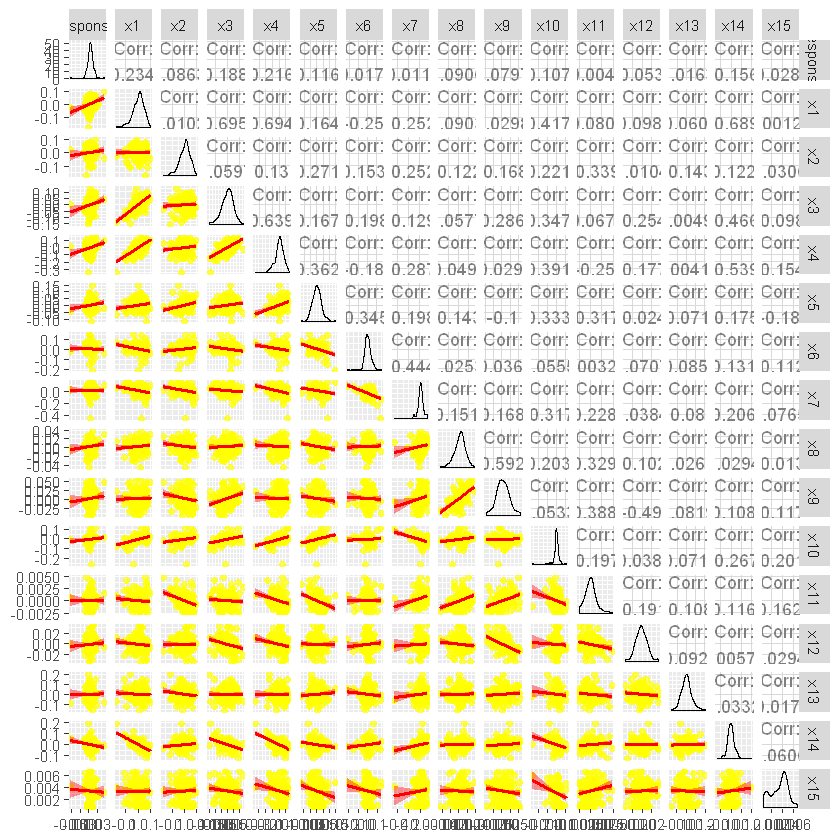

In [383]:
library(GGally)
library(ggplot2)
my_fn <- function(data, mapping, ...){
  p <- ggplot(data = data, mapping = mapping) + 
    geom_point(color="yellow",alpha=0.7)+
    geom_smooth(method=lm, fill="red", color="red", ...)
  p
}
g = ggpairs(regression_data[,-1],lower = list(continuous = my_fn))
g

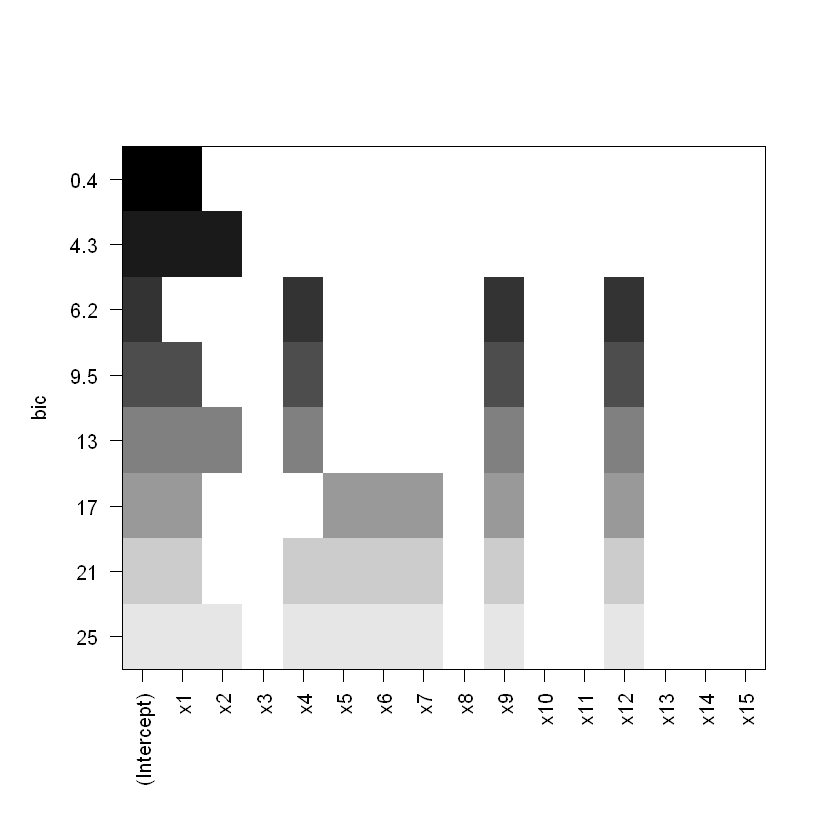

In [384]:
library(leaps)
leaps<-regsubsets(response~.,data=regression_data[,-1],nbest=1)
plot(leaps,scale="bic")

Thanks to leaps package, we have the possible models sorted by bic metric. In question 3 we will use this sorting to find a model that works.

## QUESTION 1


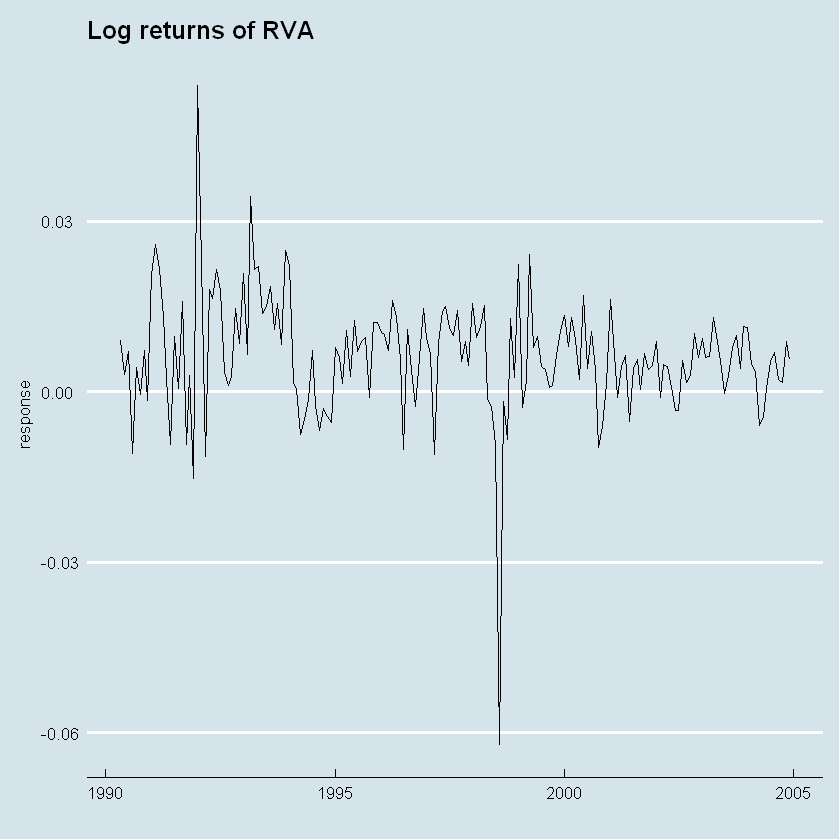

In [385]:
library(ggplot2)
library(ggthemes)
ggplot(regression_data,aes(date,response))+
  geom_line()+
  theme_economist()+
  xlab("")+
  ggtitle('Log returns of RVA')

The above graph can already indicate some heteroscedasticity issues. Below we can observe that the density estimation can resemble a somewhat skewed normal distribution plus some outliers. 

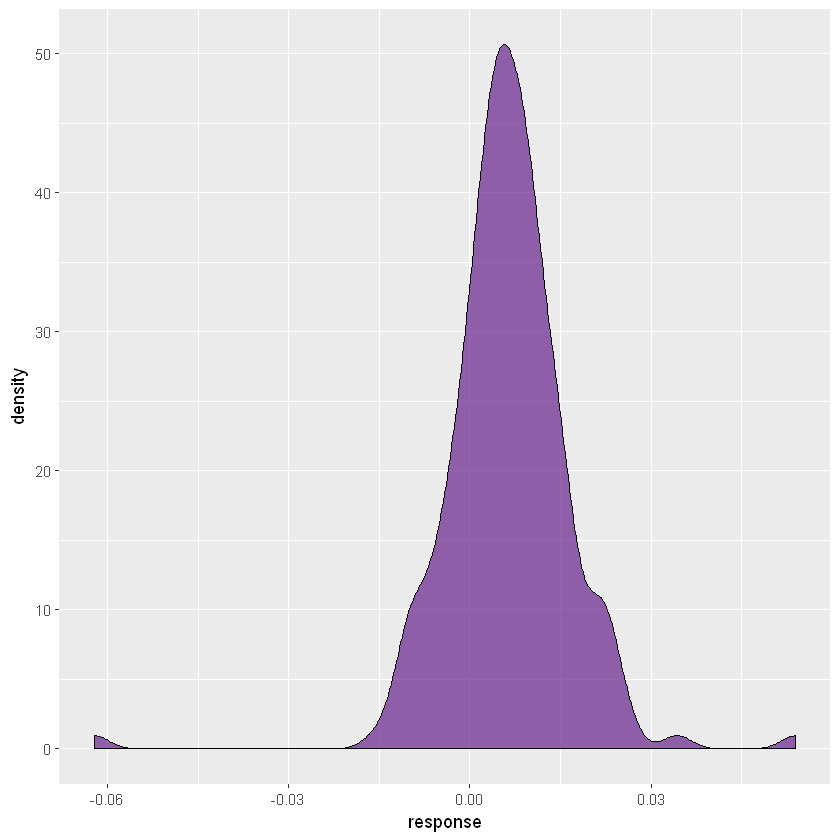

In [386]:
ggplot(regression_data,aes(x=response))+
    geom_density(fill='darkorchid4',alpha=0.7)

The first step now is to check the stationarity of the process, so we will use augmented dickey fuller test. The test below indicates that the non-stationarity assumption is rejected.

In [388]:
library(fUnitRoots)
adfTest(regression_data$response,lags=1,type=c("ct"))

Warning message in adfTest(regression_data$response, lags = 1, type = c("ct")):
"p-value smaller than printed p-value"


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 1
  STATISTIC:
    Dickey-Fuller: -7.2242
  P VALUE:
    0.01 

Description:
 Mon Feb 20 19:36:05 2017 by user: karvo


Now we need to identify the autocorrelation of our series and decide on the arma model we will use. We will graphically check this, using a ggplot function we created ourselves.

In [7]:
acplot<-function(y,title){
  library(ggfortify)
  library(gridExtra)
  p1<-autoplot(acf(y,plot=FALSE,lag.max = 150))+
    ggtitle('Autocorrelation plot')
  p2<-autoplot(pacf(y,plot=FALSE,lag.max = 150))+
    ggtitle(' Partial Autocorrelation plot')+
    ylab('PACF')
  grid.arrange(p1,p2,ncol=2,top=title)
}

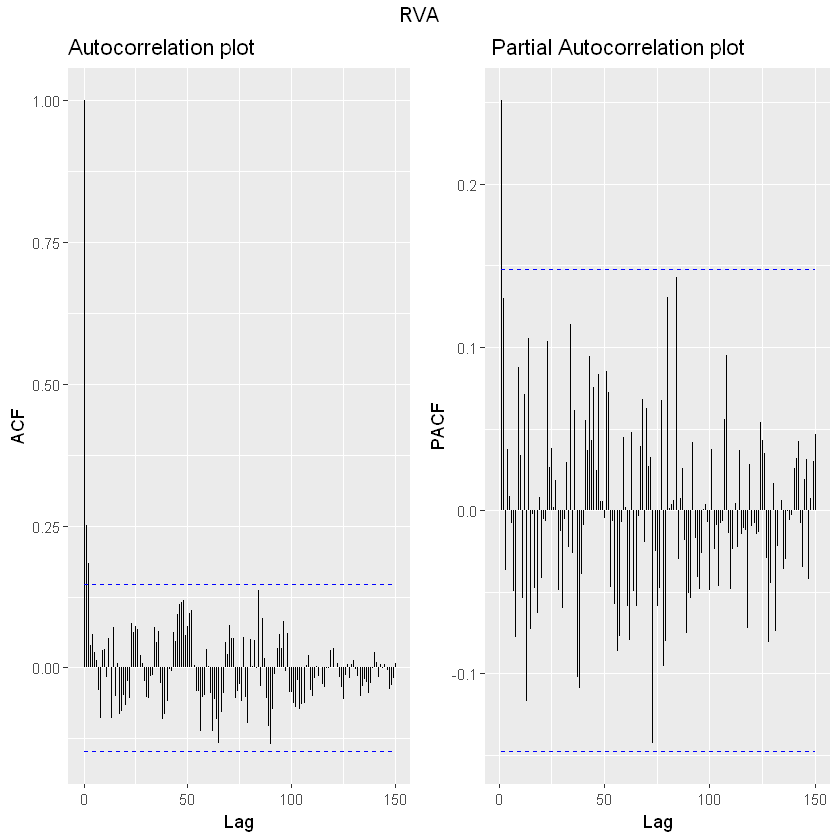

In [390]:
acplot(regression_data$response,'RVA')

In the above plot we can observe the autocorrelation of the series for each lag on the left and the partial autocorrelation on the right. These plots prove extremely useful, since they are our tool in order to identify the values of p and q in the arma(p,q) model. The blue dashed lines indicate the boundaries of Bartlett's significance test for each lag. Looking at the above graph, we could start by trying an arima(1,1) model and check how the autocorrelations and partial autocorrelations respond.

In [391]:
armafit1=arima(regression_data$response,order=c(1,0,1));armafit1


Call:
arima(x = regression_data$response, order = c(1, 0, 1))

Coefficients:
         ar1      ma1  intercept
      0.5803  -0.3506     0.0062
s.e.  0.1876   0.2136     0.0012

sigma^2 estimated as 0.0001009:  log likelihood = 559.92,  aic = -1111.85

As we can tell from above, ar1 and intercept coefficients are statistically significant. However, the coefficient of ma1 is not statistically significant. Now we have to check if we did solve the autocorrelation and partial autocorrelation occurences.

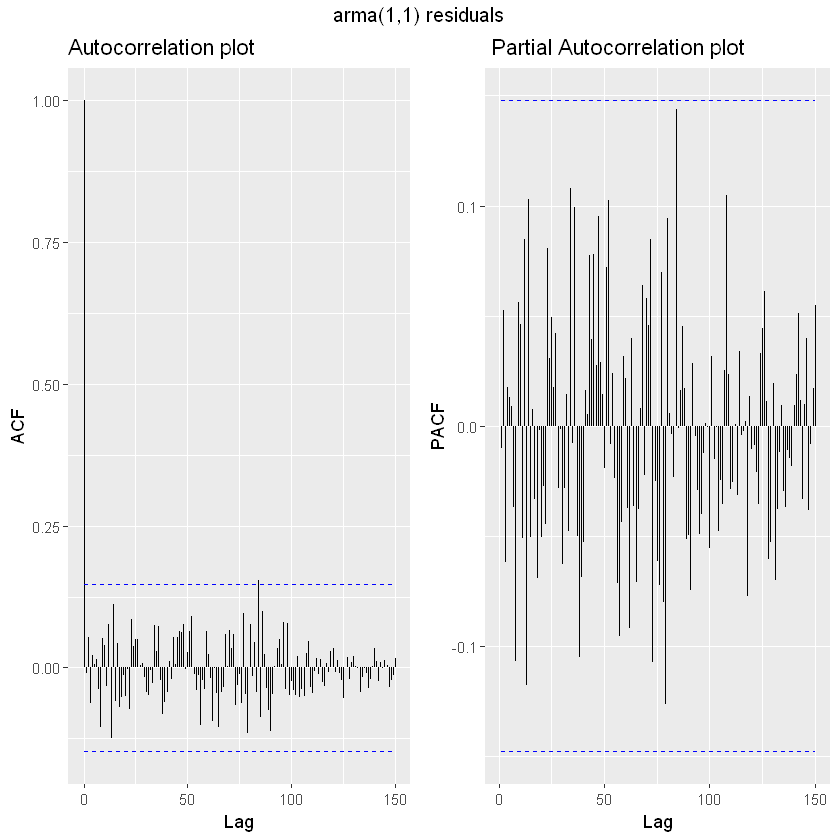

In [393]:
acplot(armafit1$residuals,"arma(1,1) residuals")

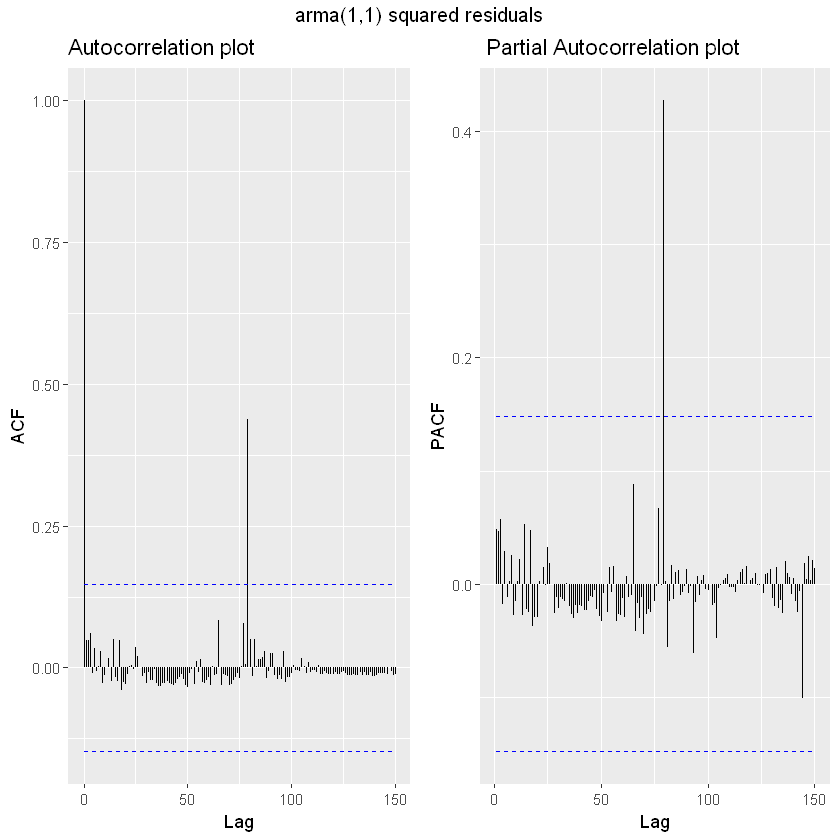

In [394]:
acplot(armafit1$residuals^2,"arma(1,1) squared residuals")

We can observe that we don't have hetescedasticity problems for the immediate lags, apart from the fact that we have a spike in correlations near lag=75. However this lag is too far away and the problem of heteroscedasticity will be handled in question 3.

As it seems, we don't have any unwanted autocorrelations and that's the first step of our diagnostics procedure. In order for our model to have relevant results, we need to check for uncorrelated residuals (the above graph of residuals ensures that),  homoscedasticity and normality of residuals. We will check graphically and through tests the normality of residuals.

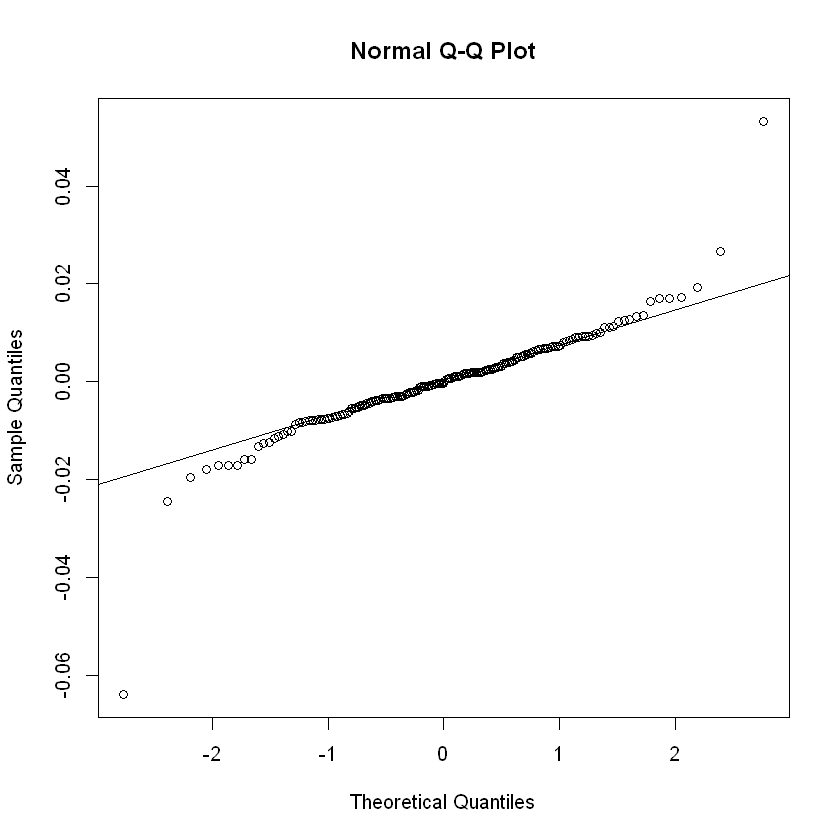

In [395]:
qqnorm(armafit1$residuals)
qqline(armafit1$residuals)

In [251]:
ks.test(armafit1$residuals,'pnorm')


	One-sample Kolmogorov-Smirnov test

data:  armafit1$residuals
D = 0.48454, p-value < 2.2e-16
alternative hypothesis: two-sided


Kolmogorov smirnov and the graphical quantile plot give strong indications against normality.

## Question 2

Now we will use the insight we gained in the exploratory procedure. While in the beggining we used adjusted $r^2$ to extract a response that "smells" an acceptable fit, this time we will use bic metric to select a model.

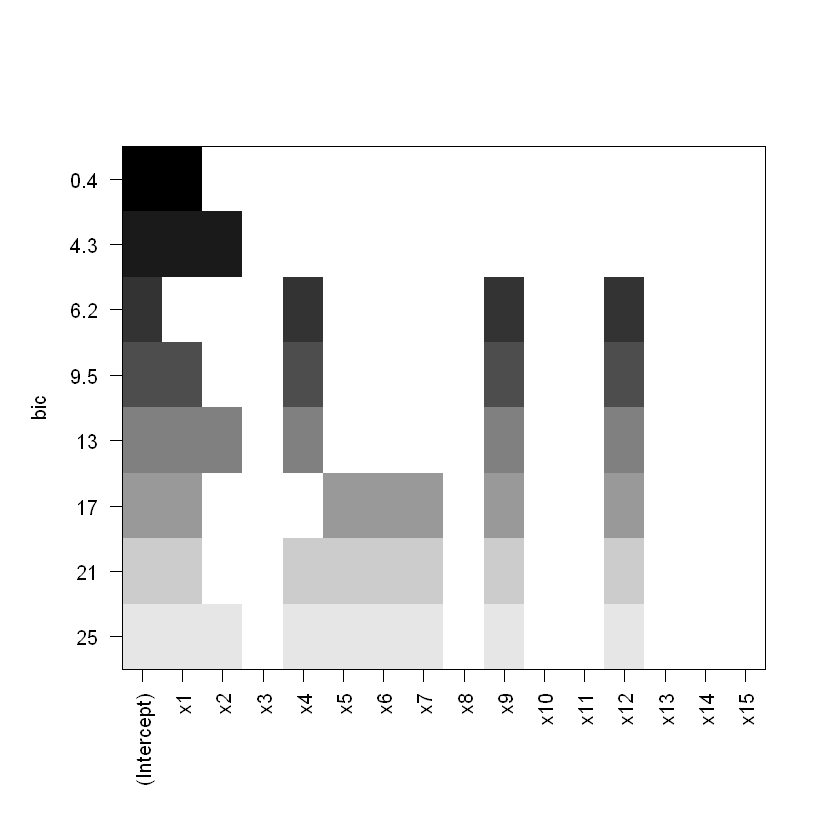

In [396]:
library(leaps)
leaps<-regsubsets(response~.,data=regression_data[,-1],nbest=1)
plot(leaps,scale="bic")

In [398]:
reg_model1<-lm(response~x1,data=regression_data)
summary(reg_model1)


Call:
lm(formula = response ~ x1, data = regression_data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.066745 -0.004778 -0.000064  0.005049  0.042134 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.0060185  0.0007727   7.789 5.85e-13 ***
x1          0.0575602  0.0181032   3.180  0.00175 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01021 on 174 degrees of freedom
Multiple R-squared:  0.05491,	Adjusted R-squared:  0.04948 
F-statistic: 10.11 on 1 and 174 DF,  p-value: 0.001746


All our coefficient are statistically significant and the adjusted r-squared is not that bad in the scale we have observed with the dataset at hand. Now we have to check the assumptions of linear regression model. It makes sense that the basic assumption of normality can be rejected. The above graphical checks ensures that.

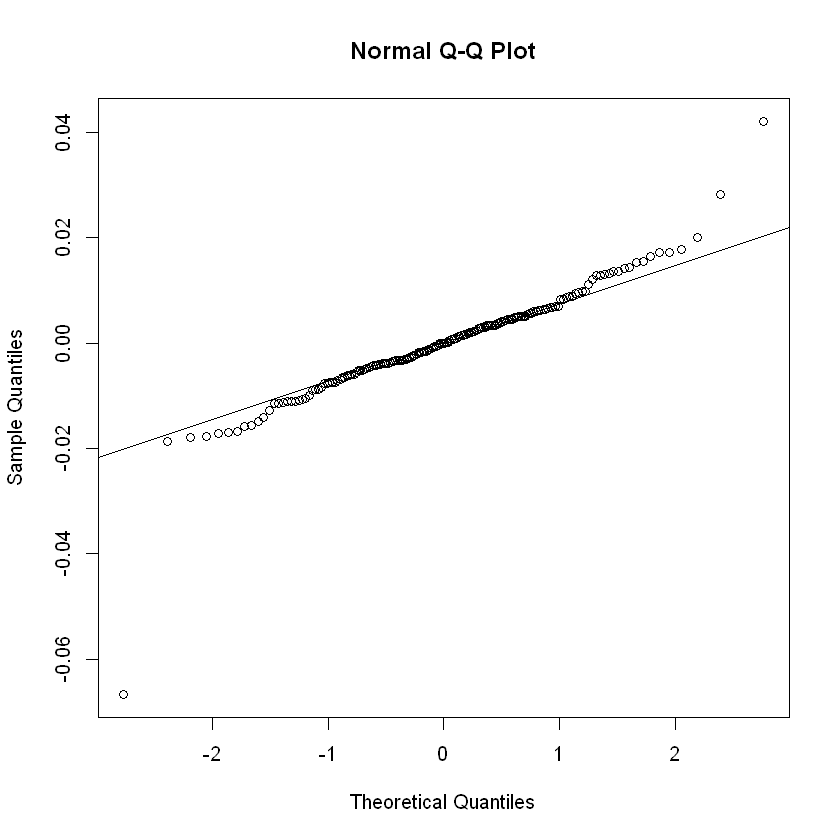

In [255]:
qqnorm(reg_model1$residuals)
qqline(reg_model1$residuals)

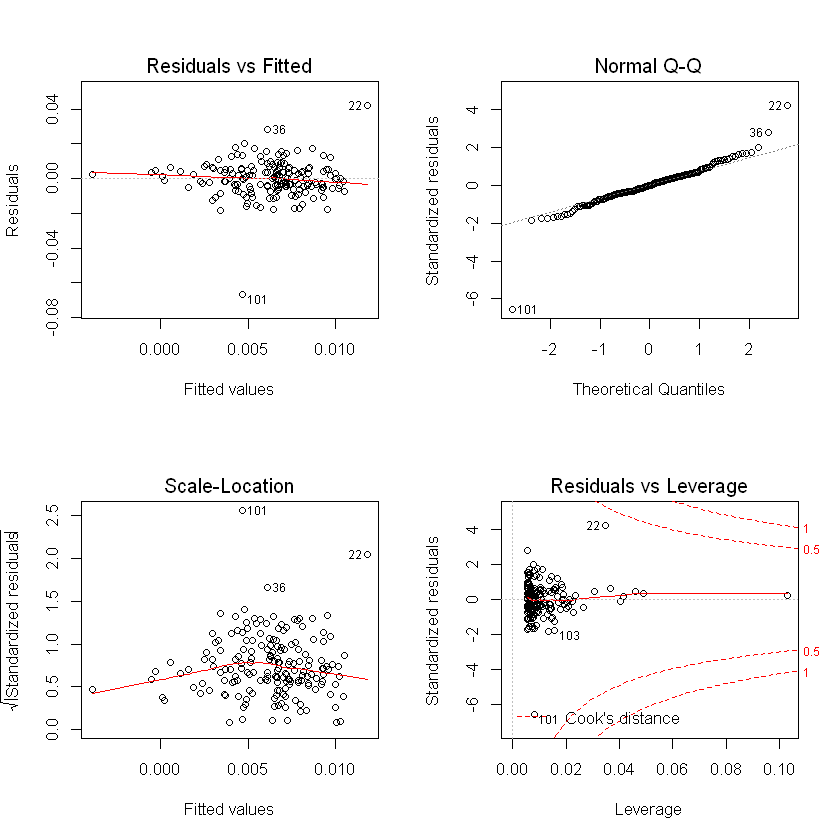

In [399]:
par(mfrow=c(2,2))
plot(reg_model1)

Normality of residuals is again rejected. This problem will be handled in question 3 by using different distribution for errors.  The above matrix of graphs also indicates that we don't have strong heteroscedasticity problems.

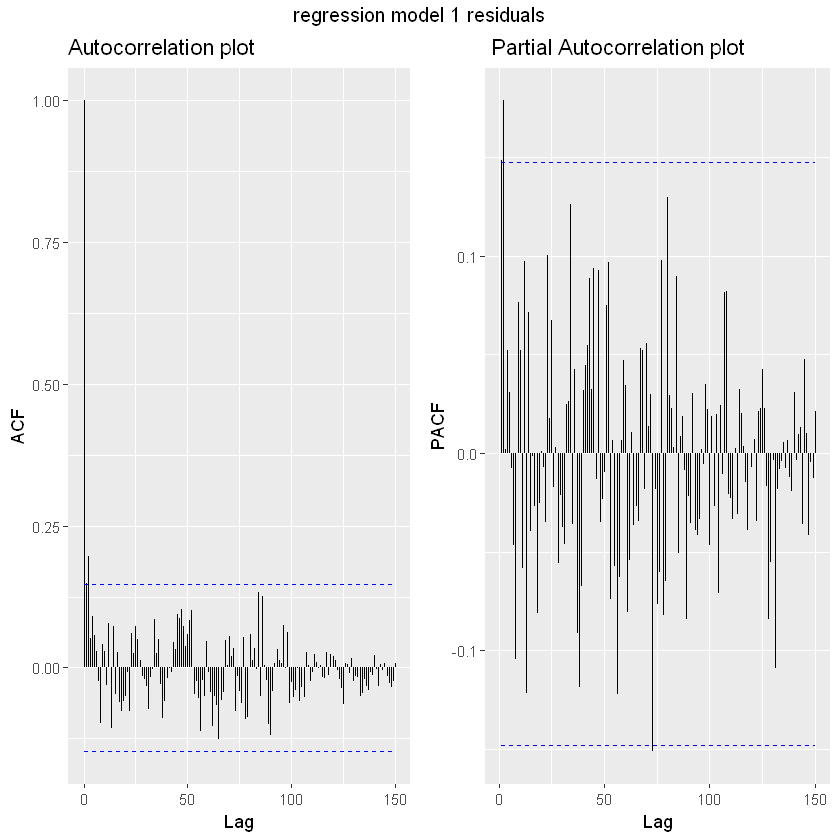

In [401]:
acplot(reg_model1$residuals,"regression model 1 residuals")

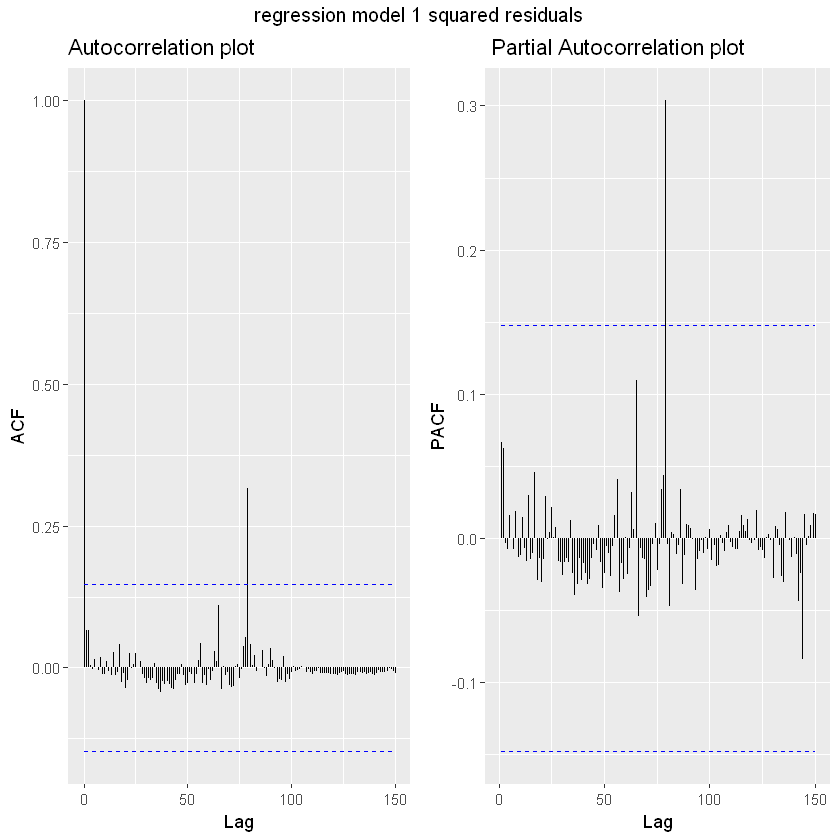

In [402]:
acplot(reg_model1$residuals^2,"regression model 1 squared residuals")

The first graph rejects the uncorrelated residuals, a problem that needs autoregressive model to be solved. The second graph indicates that we dont have any strong heteroscedasticity problems. In any case, question 3 will solve both of these problem if they occur.

## Question 3

To combine regression, autoregressive models, arch-garch models and availability to change the distribution of errors we used package rugarch. As an explanatory variable, we used the variable of the above regression model and then we iterated between different arma and garch fits, until we ended up with a model that approves all the assumptions. The proposed model has x1 as only regressor, arma(1,2) as the model of mean, arch(1) as the model of variance and t-student as the distribution of errors. 

In [403]:
library(rugarch)
spec <- ugarchspec(variance.model = list(model = "sGARCH", 
                                               garchOrder = c(1, 0)), 
                        mean.model= list(armaOrder = c(1, 2), 
                        external.regressors =as.matrix(regression_data[,3])), 
                                  distribution.model = "std")            
q3_1<- ugarchfit(spec = spec, data = regression_data$response)
q3_1


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,0)
Mean Model	: ARFIMA(1,0,2)
Distribution	: std 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.006145    0.000787   7.8077 0.000000
ar1    -0.058558    0.230452  -0.2541 0.799419
ma1     0.267194    0.208335   1.2825 0.199659
ma2     0.269204    0.060643   4.4392 0.000009
mxreg1  0.020184    0.014643   1.3784 0.168088
omega   0.000072    0.000027   2.6780 0.007406
alpha1  0.355657    0.255781   1.3905 0.164384
shape   3.327310    0.931133   3.5734 0.000352

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.006145    0.000882  6.96636 0.000000
ar1    -0.058558    0.257178 -0.22769 0.819885
ma1     0.267194    0.172944  1.54498 0.122351
ma2     0.269204    0.058887  4.57157 0.000005
mxreg1  0

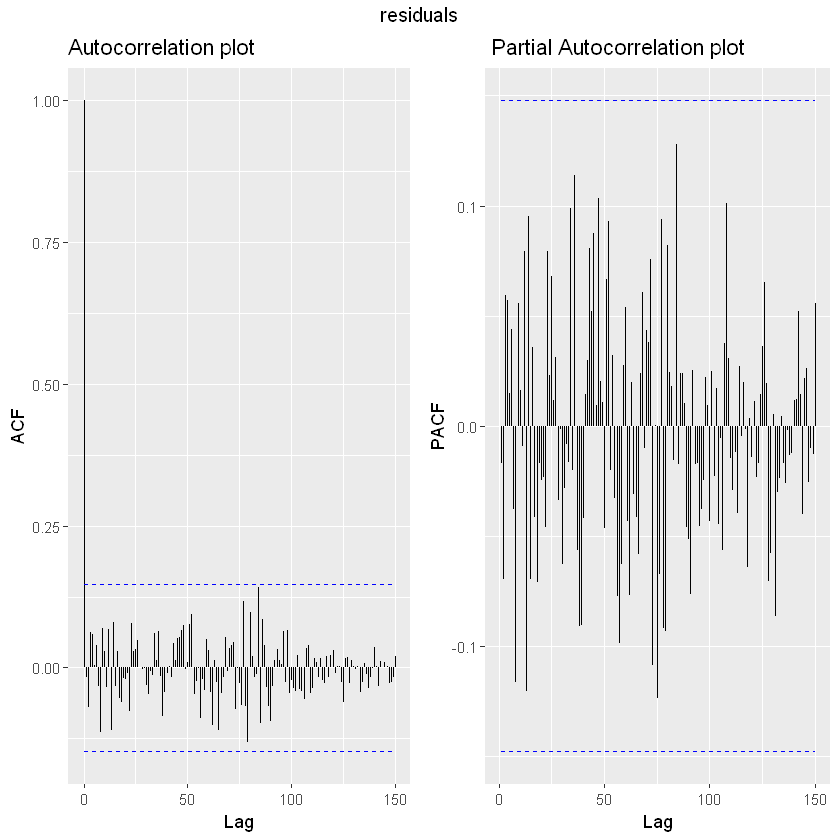

In [406]:
acplot(q3_1@fit$residuals,"residuals")

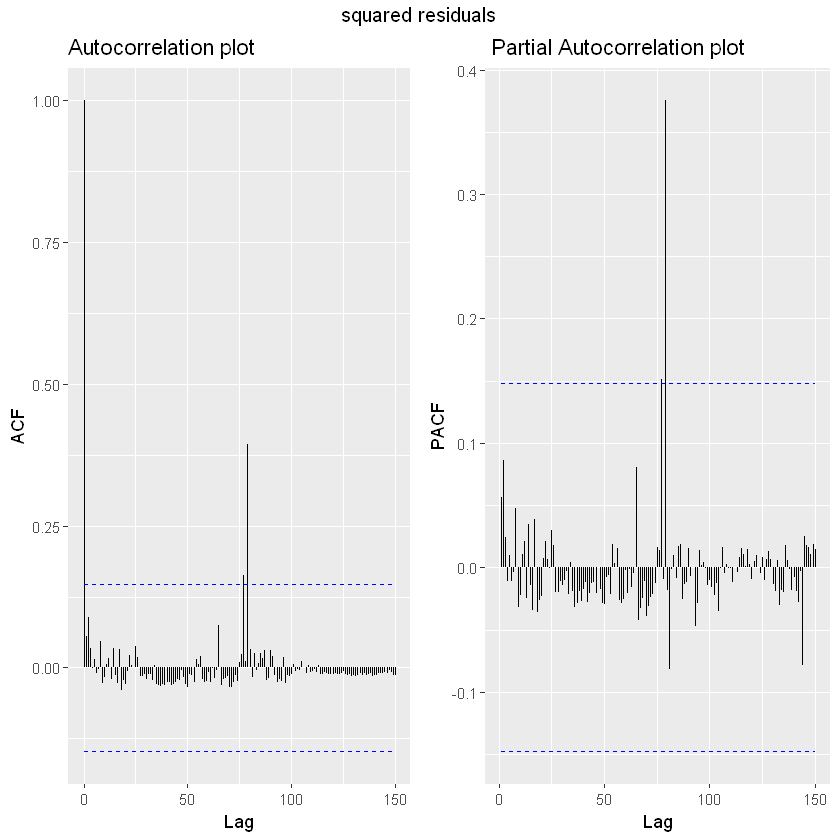

In [407]:
acplot(q3_1@fit$residuals^2,"squared residuals")

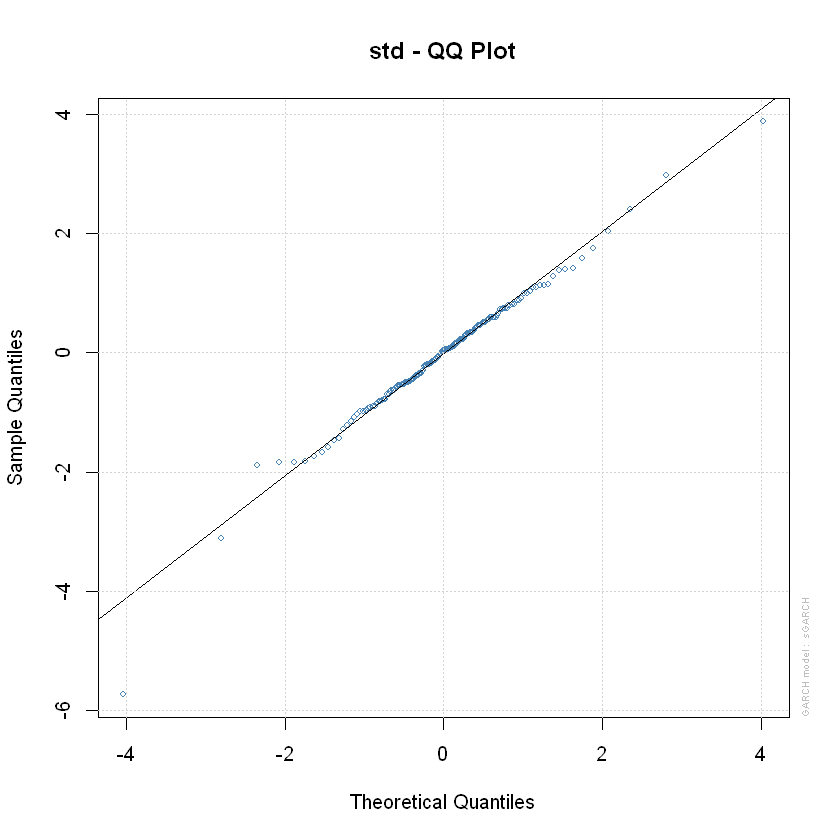

In [269]:
plot(q3_1,which=9)

## Question 4

For starters, we used the basic R functions to gain the aic metric for each model. However we observed big differences between the aic metric of the first 2 models and aic metric that rugarch returns. Therefore, we computed aic metric by hand for our results to be comparable.

In [270]:
aicarma1<-(-2*armafit1$log+2*length(armafit1$coef))/dim(regression_data)[1]
aicreg1<-(-2*logLik(reg_model1)[1]+2*length(reg_model1))/dim(regression_data)[1]
aicq3_1<-(-2*likelihood(q3_1)+2*length(q3_1@fit$coef))/dim(regression_data)[1]

In [271]:
aicarma1;aicreg1;aicq3_1

[1] -6.328688

[1] -6.205566

[1] -6.657427

Based on aic metric, we select the last model that combines all our knowledge up to this point.

## Question 5

In [44]:
MSFE<-function(predictions,data){
    sum=0
    for (i in length(data)){
        sum=sum+(predictions[i]-data[i])^2
    }
    sum=sum/12
    return(sum)
}

Check if the function works...

In [359]:
MSFE(predict(armafit1,12)$pred,tail(my_data$RVA,12))

[1] 2.288502e-06

In [43]:
Hit_ratio<-function(predictions,data){
    sum<-0
    for(i in length(data)){
        if(predictions[i]*data[i]>0){
            sum<-sum+1
        }
    }
    sum<-sum/12
    return(sum)
}

In [410]:
newx=data.frame(my_data[178:189,11])
names(newx)<-c("x1")

In [411]:
mfse1<-MSFE(predict(armafit1,12)$pred,tail(my_data$RVA,12))
mfse2<-MSFE(predict.lm(reg_model1,newx,se.fit = TRUE)$fit,tail(my_data$RVA,12))
mfse3<-MSFE(array(ugarchforecast(q3_1, newx, n.ahead=12, n.old=176)@forecast$seriesFor),tail(my_data$RVA,12))

In [412]:
mfse1;mfse2;mfse3

[1] 2.288502e-06

12 
2.681477e-06

[1] 2.36725e-06

Based on mfse this time, the last model would is slightly worse than the simple arma modelling. This result illustrates a bunch of things, among them the weak occurences of heteroscedasticity and the low predictive power of the explanatory at hand.

In [413]:
hit1<-Hit_ratio(predict(armafit1,12)$pred,tail(my_data$RVA,12))
hit2<-Hit_ratio(predict.lm(reg_model1,newx,se.fit = TRUE)$fit,tail(my_data$RVA,12))
hit3<-Hit_ratio(array(ugarchforecast(q3_1, newx, n.ahead=12, n.old=176)@forecast$seriesFor),tail(my_data$RVA,12))

In [414]:
hit1;hit2;hit3

[1] 0.08333333

[1] 0.08333333

[1] 0.08333333

As far as hit ratio is concerned, a metric that could be useful in hedge funds and derivative markets in general, we seem to be indifferent between the 3 models. 

# 2nd time series

In [1]:
regression_data<-my_data[1:177,c(1,6,11:25)]
names(regression_data)<-c('date','response','x1','x2','x3','x4','x5','x6','x7','x8','x9','x10',
                          'x11','x12','x13','x14','x15')
library(DataCombine)
for(i in names(regression_data)[-c(1,2)]){
  regression_data<-slide(regression_data,Var = i,slideBy = -1,NewVar = i)
}
regression_data<-regression_data[2:177,]


Remember to put regression_data in time order before running.

Lagging x1 by 1 time units.


Remember to put regression_data in time order before running.

Lagging x2 by 1 time units.


Remember to put regression_data in time order before running.

Lagging x3 by 1 time units.


Remember to put regression_data in time order before running.

Lagging x4 by 1 time units.


Remember to put regression_data in time order before running.

Lagging x5 by 1 time units.


Remember to put regression_data in time order before running.

Lagging x6 by 1 time units.


Remember to put regression_data in time order before running.

Lagging x7 by 1 time units.


Remember to put regression_data in time order before running.

Lagging x8 by 1 time units.


Remember to put regression_data in time order before running.

Lagging x9 by 1 time units.


Remember to put regression_data in time order before running.

Lagging x10 by 1 time units.


Remember to put regression_data in time order before running.

Laggi

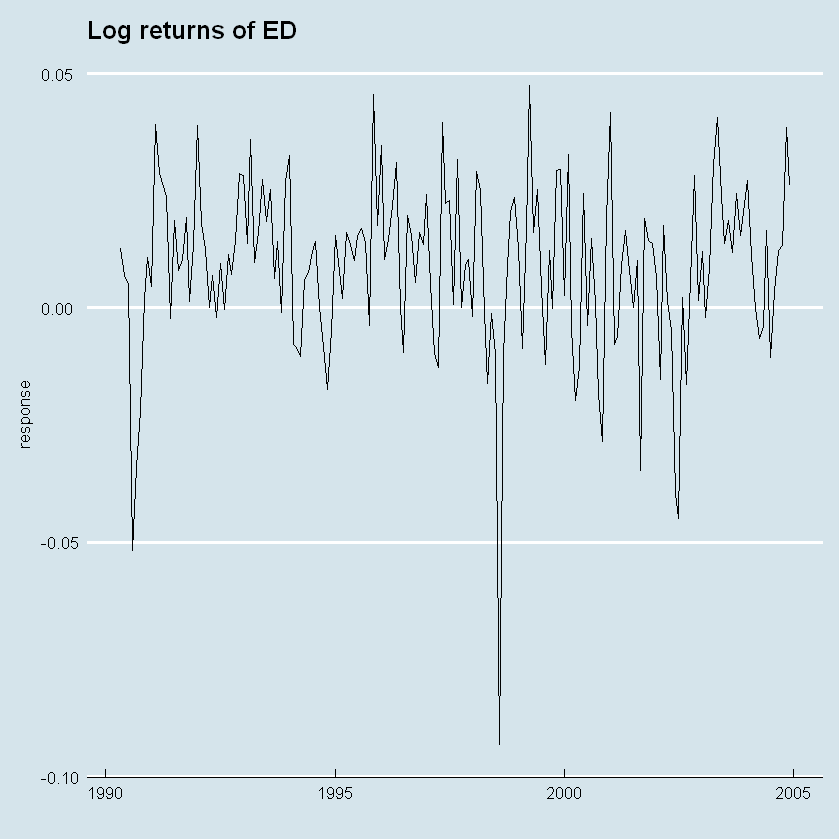

In [2]:
library(ggplot2)
library(ggthemes)
ggplot(regression_data,aes(date,response))+
  geom_line()+
  theme_economist()+
  xlab("")+
  ggtitle('Log returns of ED')

Again in this case, we observe that the volatility of the series can be clustered, therefore this indicates heteroscedasticity problems. Below we estimated again the density of the series, which resembles a skewed normal or student.

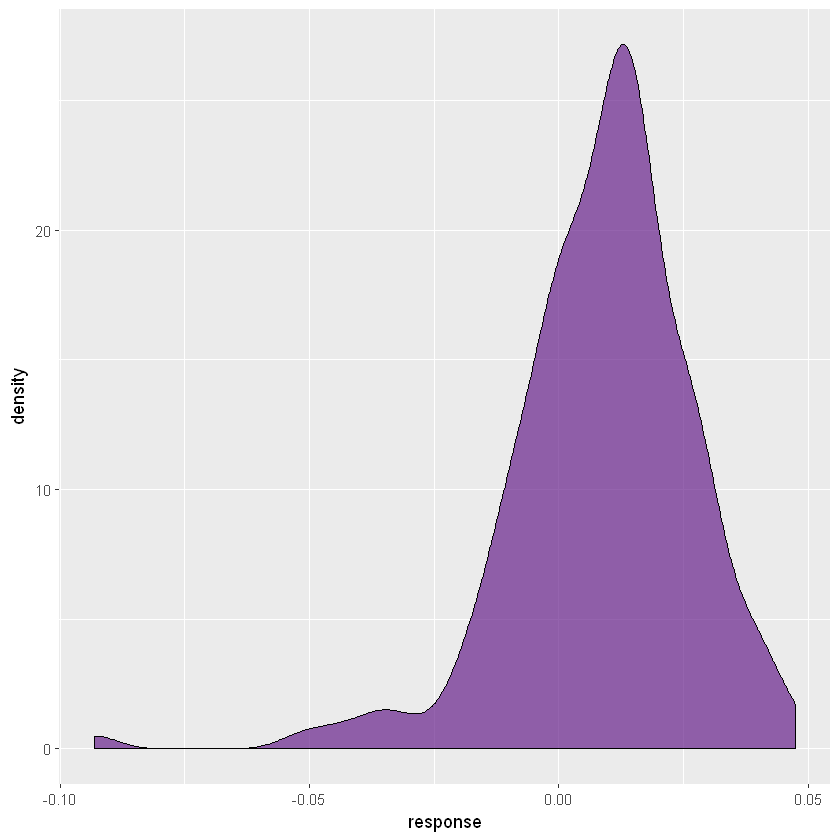

In [3]:
ggplot(regression_data,aes(x=response))+
    geom_density(fill='darkorchid4',alpha=0.7)

In [5]:
library(fUnitRoots)
adfTest(regression_data$response,lags=1,type=c("ct"))

Warning message in adfTest(regression_data$response, lags = 1, type = c("ct")):
"p-value smaller than printed p-value"


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 1
  STATISTIC:
    Dickey-Fuller: -7.4637
  P VALUE:
    0.01 

Description:
 Mon Feb 20 21:31:14 2017 by user: karvo


The above test ensures stationarity assumption. We continue by searching for the arma model which tackles the autocorrelation issues.

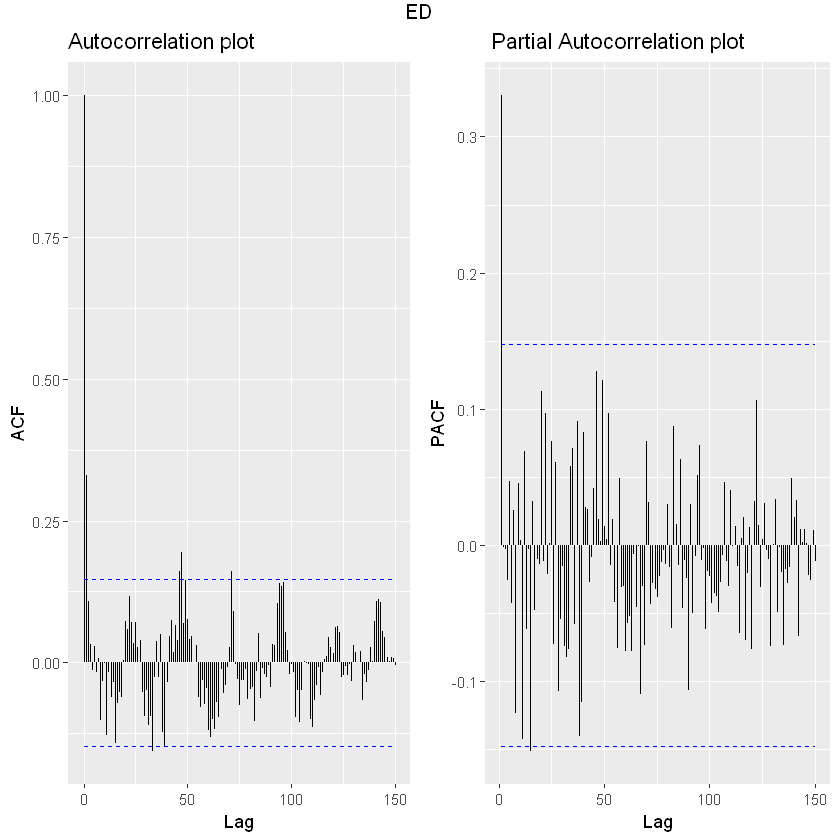

In [8]:
acplot(regression_data$response,'ED')

Again the above graph offers indications for the use of a moving average model and autoregressive model. We tried ar(1),ma(1) and arma(1,1) and concluded that the differences between them are slight, so we picked ma(1) to continue.

In [9]:
armafit2=arima(regression_data$response,order=c(0,0,1));armafit2


Call:
arima(x = regression_data$response, order = c(0, 0, 1))

Coefficients:
         ma1  intercept
      0.3066     0.0086
s.e.  0.0674     0.0017

sigma^2 estimated as 0.0003061:  log likelihood = 462.28,  aic = -918.56

Autocorrelation and Partial Autocorrelation plot of the series indicated that we need at least a moving average model. The fit above makes sure that ma1 coefficient is statistically significant, while the graph below indicates that we have succesfully killed the autocorrelation problems.

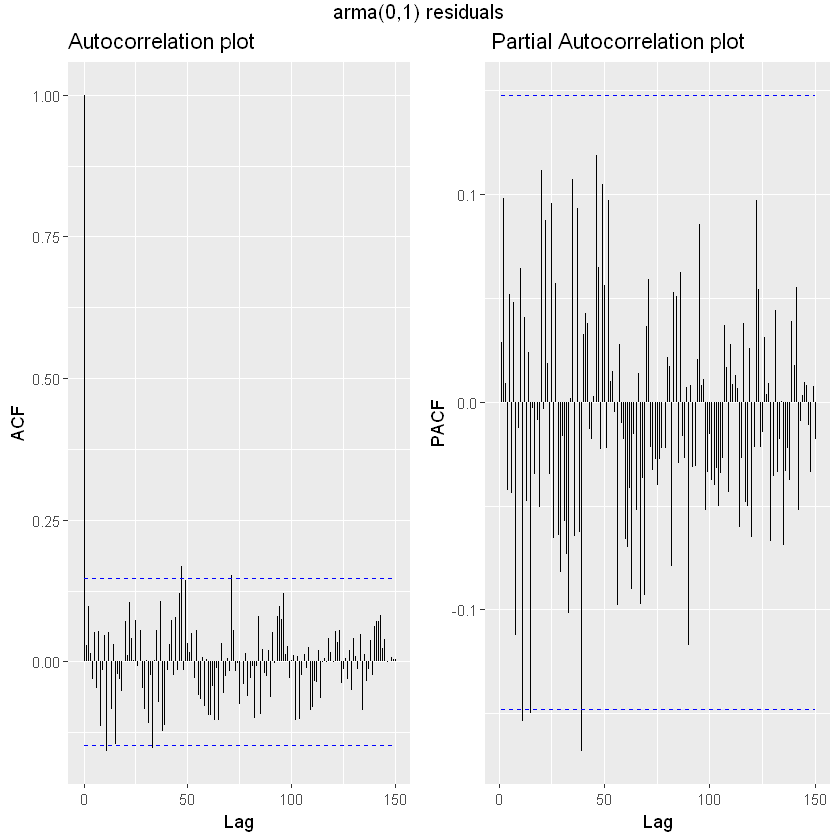

In [10]:
acplot(armafit2$residuals,"arma(0,1) residuals")

As it seems, the above model solves the autocorrelation and partial autocorrelation issues. Since now we have uncorrelated residuals assumption checked, we only have to test normality and homoscedasticity assumptions.

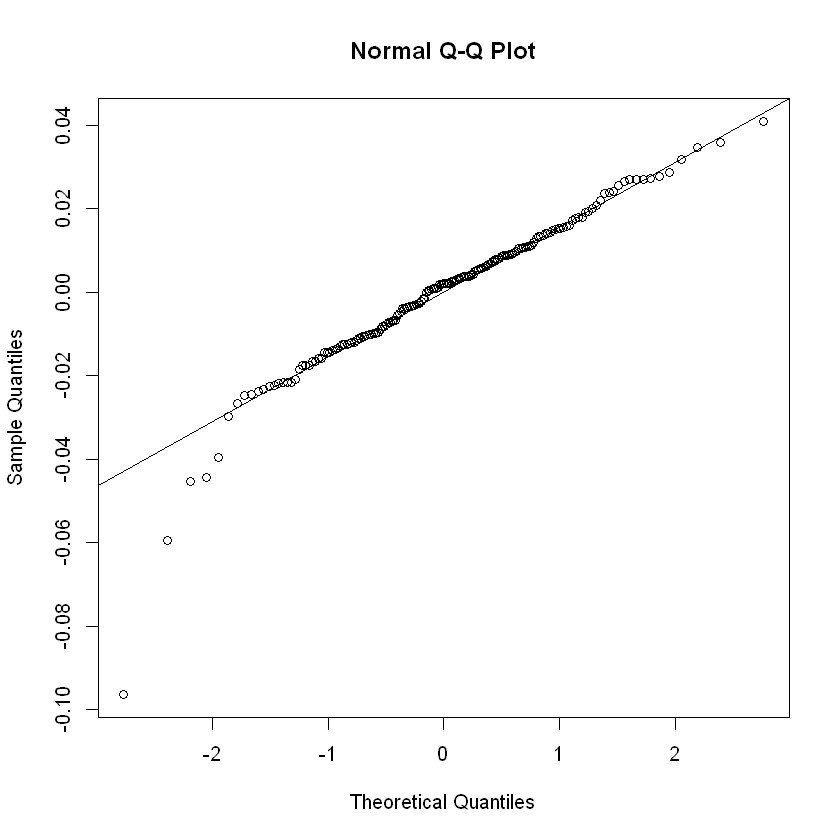

In [11]:
qqnorm(armafit2$residuals)
qqline(armafit2$residuals)

The quantile plot indicates that normality assumption may not be that far from truth. Wilcox test cant reject normality, so for now we can assume that normality assumption is not rejected.

In [12]:
wilcox.test(armafit2$residuals)


	Wilcoxon signed rank test with continuity correction

data:  armafit2$residuals
V = 8175, p-value = 0.568
alternative hypothesis: true location is not equal to 0


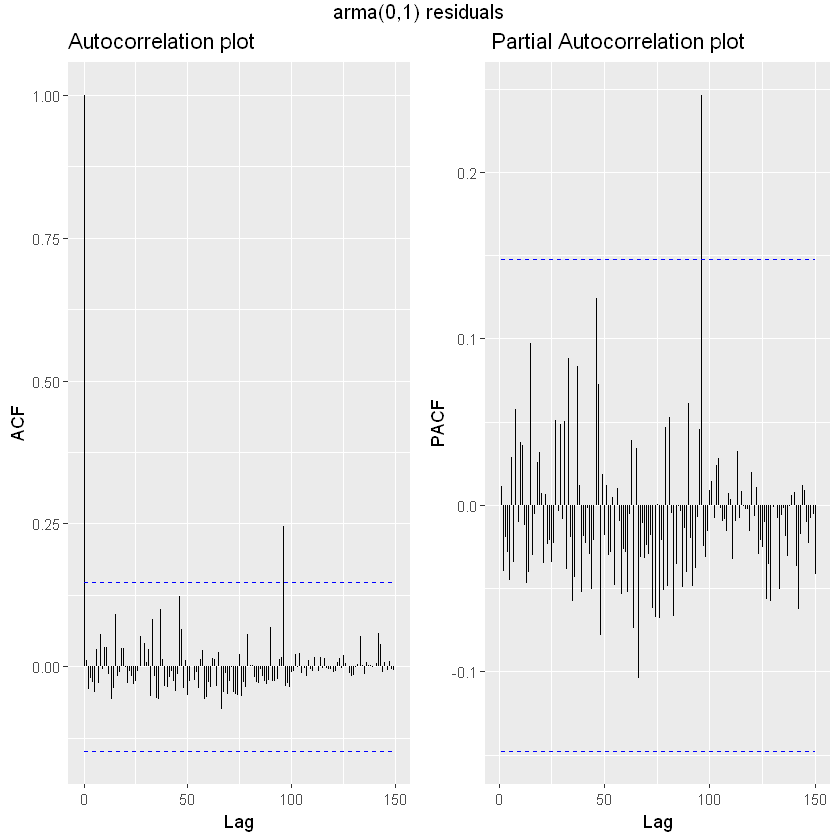

In [13]:
acplot(armafit2$residuals^2,"arma(0,1) residuals")

We can spot some autocorrelations in squared residuals for big lag, however it is not that big of an effect so for now we can still assume that homoscedasticity assumption is not breached.

## Question 2

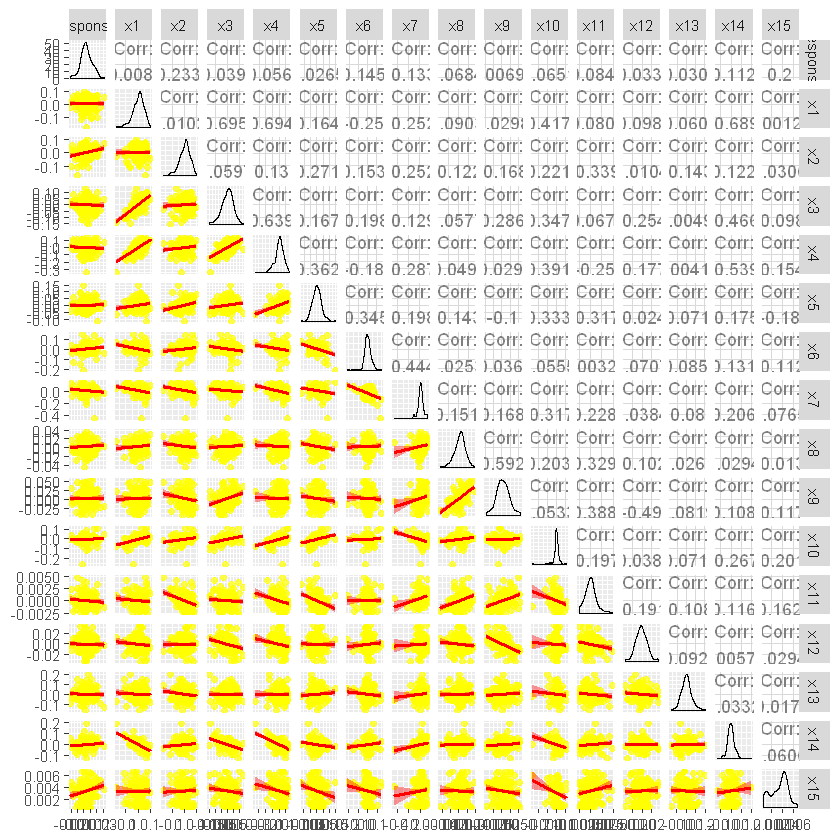

In [17]:
library(GGally)
g = ggpairs(regression_data[,-1],lower = list(continuous = my_fn))
g

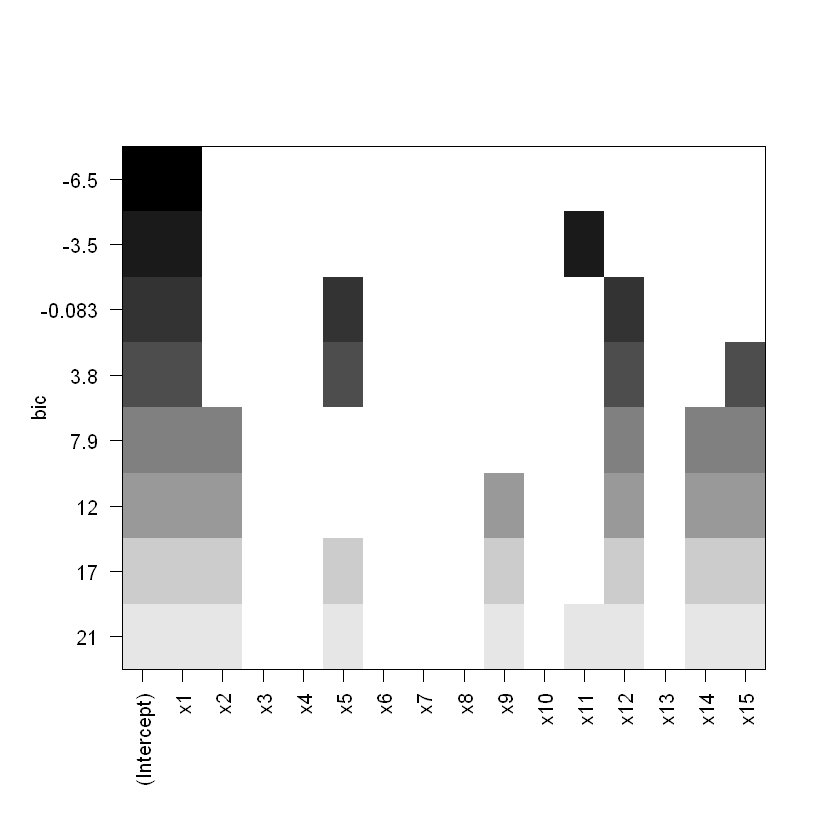

In [14]:
library(leaps)
leaps<-regsubsets(response~.,data=regression_data[,-1],nbest=1)
plot(leaps,scale="bic")

In [15]:
reg_model2<-lm(response~x1,data=regression_data)
summary(reg_model2)


Call:
lm(formula = response ~ x1, data = regression_data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.098135 -0.010556  0.001981  0.011371  0.039298 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.008132   0.001338   6.077 7.53e-09 ***
x1          0.131100   0.031350   4.182 4.58e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01768 on 174 degrees of freedom
Multiple R-squared:  0.09133,	Adjusted R-squared:  0.0861 
F-statistic: 17.49 on 1 and 174 DF,  p-value: 4.575e-05


Coefficients prove to be statistically significant. The quantile plot below does not offer strong indications against normality assumption. Normality tests seem to offer ambivalent results though and that's a sign that we should try different distributions too in question 3.

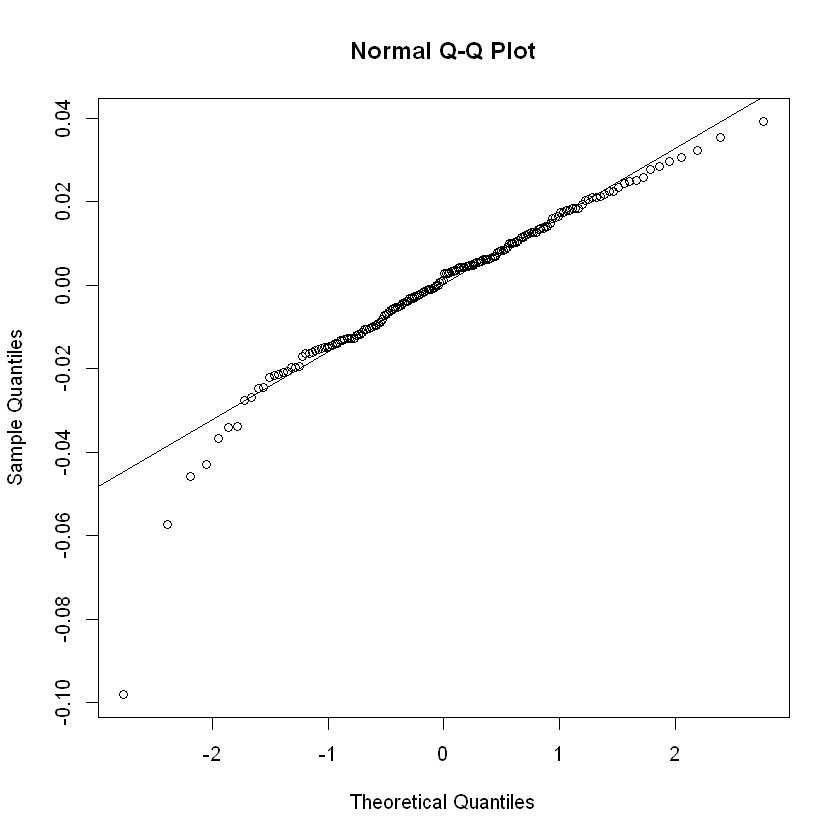

In [16]:
qqnorm(reg_model2$residuals)
qqline(reg_model2$residuals)

In [17]:
ks.test(reg_model2$residuals,'pnorm');wilcox.test(reg_model2$residuals)


	One-sample Kolmogorov-Smirnov test

data:  reg_model2$residuals
D = 0.48433, p-value < 2.2e-16
alternative hypothesis: two-sided



	Wilcoxon signed rank test with continuity correction

data:  reg_model2$residuals
V = 8256, p-value = 0.4898
alternative hypothesis: true location is not equal to 0


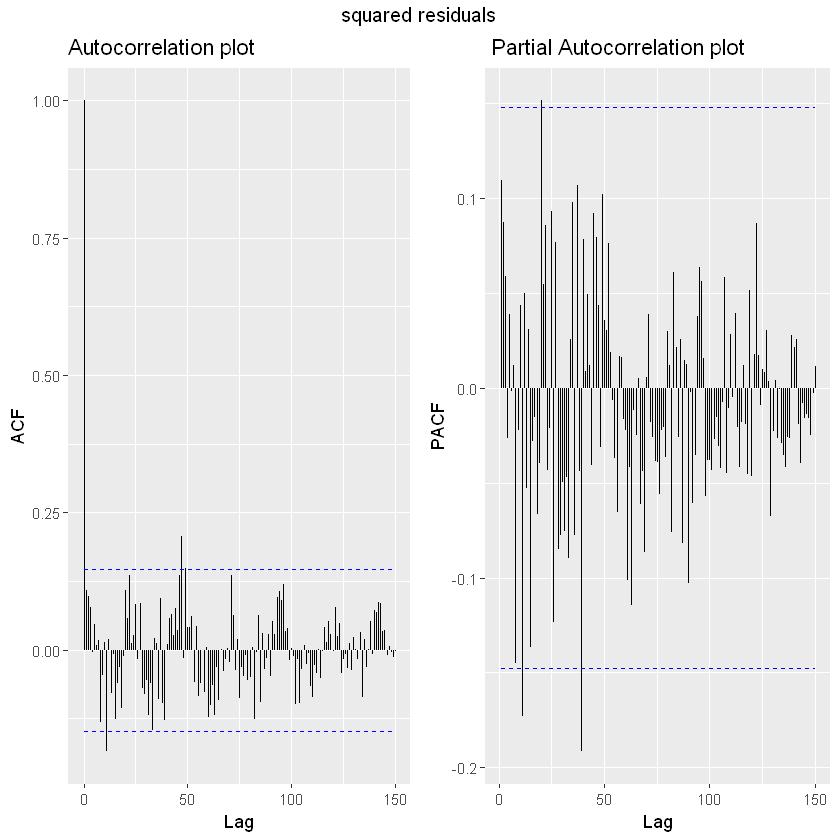

In [18]:
acplot(reg_model2$residuals,"squared residuals")

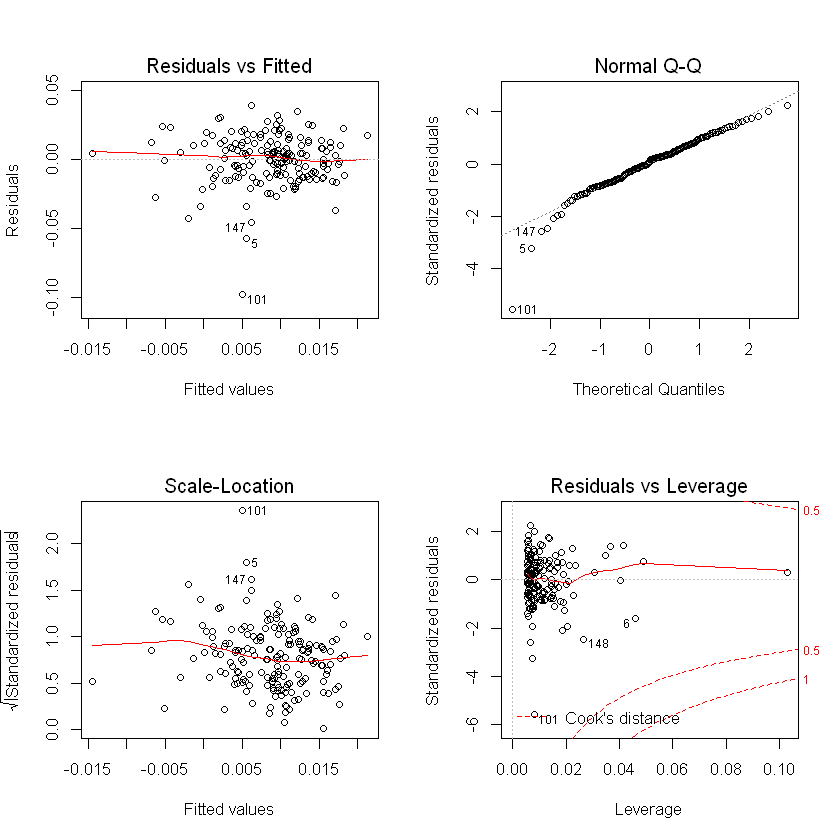

In [20]:
par(mfrow=c(2,2))
plot(reg_model2)

Autocorrelation and Partial autocorrelation plots for squared residuals indicate that we may have some slight heteroscedasticity issues. The same hint can be taken from the first graph in the above matrix of graphs as the variance of residuals does not seem to be stable across x-axis.

## Question 3

In [36]:
library(rugarch)
spec <- ugarchspec(variance.model = list(model = "sGARCH", 
                                               garchOrder = c(1, 1)), 
                        mean.model= list(armaOrder = c(0, 1), 
                        external.regressors =as.matrix(regression_data[,3])), 
                                  distribution.model = "sstd",fixed.pars=list(omega=0,alpha1=0))
                                                                         
q3_2<- ugarchfit(spec = spec, data = regression_data$response)
q3_2


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(0,0,1)
Distribution	: sstd 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.008831    0.001446   6.1048 0.000000
ma1     0.162222    0.090569   1.7911 0.073270
mxreg1  0.049495    0.039850   1.2420 0.214225
omega   0.000000          NA       NA       NA
alpha1  0.000000          NA       NA       NA
beta1   0.999000    0.001338 746.7060 0.000000
skew    0.842879    0.089477   9.4201 0.000000
shape   6.413077    2.452208   2.6152 0.008917

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.008831    0.001446   6.1053 0.000000
ma1     0.162222    0.092804   1.7480 0.080464
mxreg1  0.049495    0.046573   1.0627 0.287899
omega   0.000000          NA       NA       NA
alpha1  

In the above model specification we again used x1 as predictor and arma(1,0) as mean modeling. While we wanted to use garch(0,1) as variance model, that induced convergence problem. So we made use of garch(1,1) and kept alpha1 parameter fixed to zero. The above results also indicate that we have indications to say that our variables are statistically significant. The graph below also ensures that the use of t-student distribution is not an irrational choice.

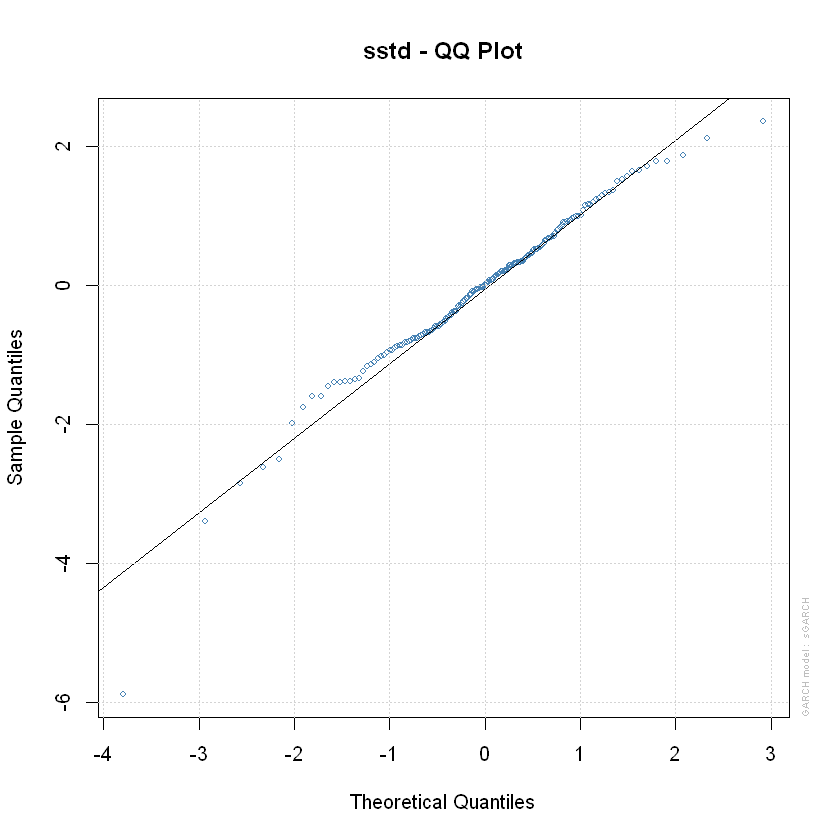

In [38]:
plot(q3_2,which=9)

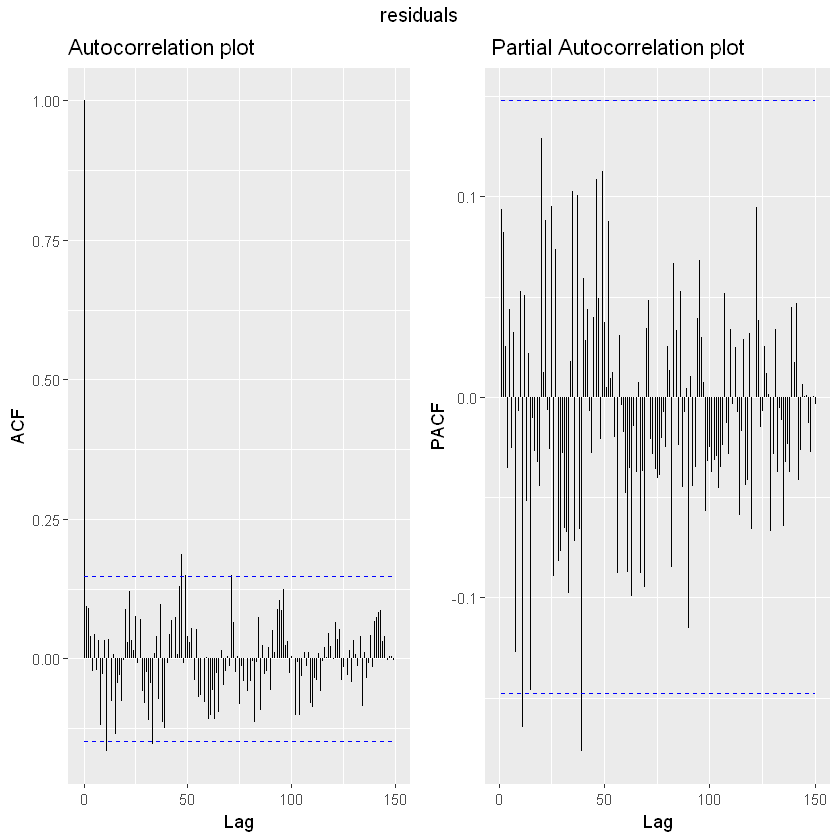

In [37]:
acplot(q3_2@fit$residuals,"residuals")

While we haven't eradicated completely the autocorrelations and partial autocorrelations, the problems are not that strong and our experimentation with alternative models induced bigger problems with residuals. So in order to avoid strong autocorrelations in $residuals^2$, we sacrificed some slight autocorrelations to keep our model parsimonious.

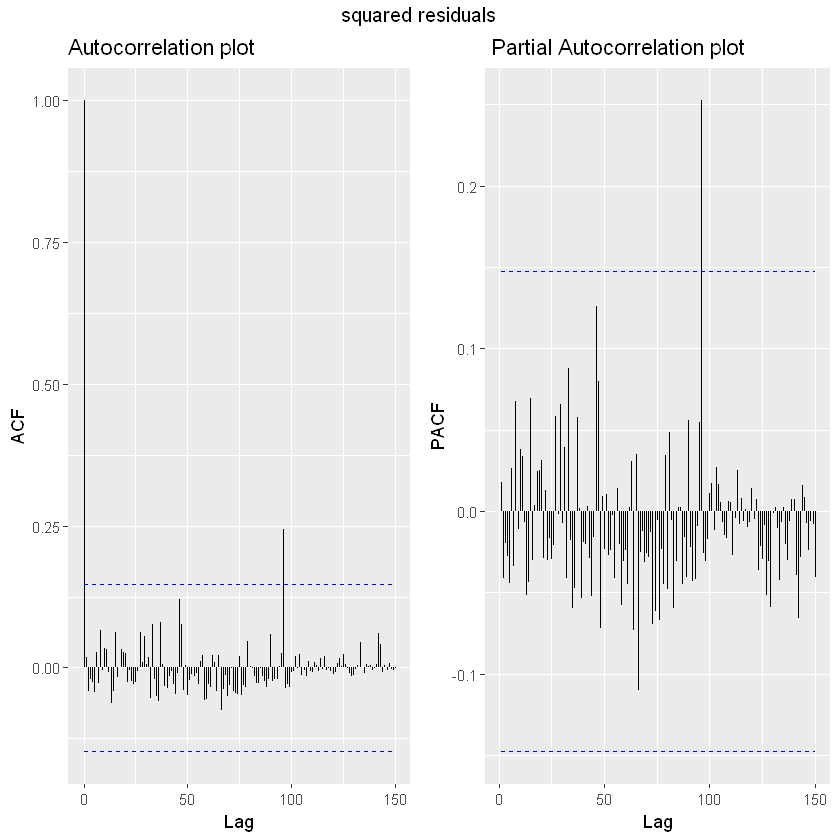

In [23]:
acplot(q3_2@fit$residuals^2,"squared residuals")

Again, we can observe that we have a spike of autocorrelation in lag near 100. That kind of lag is not that big of an effect and our trials to kill it, induced bigger problems in shorter lags. Overall, the above model had the minimum problems we could accomplish.

## Question 4

In [39]:
aicarma2<-(-2*armafit2$log+2*length(armafit2$coef))/dim(regression_data)[1]
aicreg2<-(-2*logLik(reg_model2)[1]+2*length(reg_model2))/dim(regression_data)[1]
aicq3_2<-(-2*likelihood(q3_2)+2*length(q3_2@fit$coef))/dim(regression_data)[1]

In [40]:
aicarma2;aicreg2;aicq3_2

[1] -5.230476

[1] -5.107342

[1] -5.294737

In this case too, based on aic metric we would choose the last model with regressor x1, arma(0,1), garch(1,1) and t-student error distribution.

## Question 5

In [41]:
newx=data.frame(my_data[178:189,11])
names(newx)<-c("x1")

In [45]:
mfse1<-MSFE(predict(armafit2,12)$pred,tail(my_data$ED,12))
mfse2<-MSFE(predict.lm(reg_model2,newx,se.fit = TRUE)$fit,tail(my_data$ED,12))
mfse3<-MSFE(array(ugarchforecast(q3_2, newx, n.ahead=12, n.old=176)@forecast$seriesFor),tail(my_data$ED,12))

In [371]:
mfse1;mfse2;mfse3

[1] 1.158673e-06

12 
1.868725e-06

[1] 1.199274e-06

In [46]:
hit1<-Hit_ratio(predict(armafit2,12)$pred,tail(my_data$ED,12))
hit2<-Hit_ratio(predict.lm(reg_model2,newx,se.fit = TRUE)$fit,tail(my_data$ED,12))
hit3<-Hit_ratio(array(ugarchforecast(q3_2,newx, n.ahead=12, n.old=176)@forecast$seriesFor),tail(my_data$ED,12))

In [47]:
hit1;hit2;hit3

[1] 0.08333333

[1] 0.08333333

[1] 0.08333333

In this series too, hit ratio metric makes the models indifferent to us, while mfse metric would slightly choose the autoregressive modelling.
